# Python for Finance (Overview)


In [12]:
import pandas
import matplotlib
pandas.__version__  # Pandas current version
matplotlib.__version__ # Matplotlib current version
                        # Quandl API key: "54oxqVQ7BxSJHyGeFd6s"

'3.2.2'

Plotting a time series chart

In [15]:
import quandl
# Retrieving datasets from Quandl
QUANDL_API_KEY = '54oxqVQ7BxSJHyGeFd6s'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN') # ABN Amro Group from Euronext Stock Exchange

In [16]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [17]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-06-26,7.820,7.882,7.418,7.418,4592755.0,34717054.0
2020-06-29,7.416,7.846,7.358,7.744,5180835.0,39689220.0
2020-06-30,7.776,7.860,7.520,7.666,4967843.0,37988712.0
2020-07-01,7.680,7.836,7.550,7.652,4334288.0,33384295.0
2020-07-02,7.782,8.130,7.710,8.006,6311808.0,50468953.0


Visualize the DataFrame

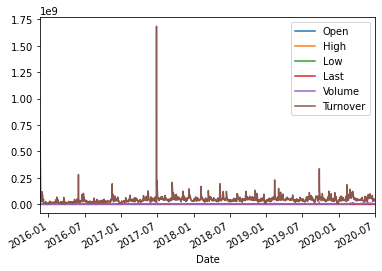

In [18]:
import matplotlib.pyplot as plt
df.plot()

Plotting a price and volume chart

In [20]:
prices = df['Last']
volumes = df['Volume']
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [21]:
volumes.tail()

Date
2020-06-26    4592755.0
2020-06-29    5180835.0
2020-06-30    4967843.0
2020-07-01    4334288.0
2020-07-02    6311808.0
Name: Volume, dtype: float64

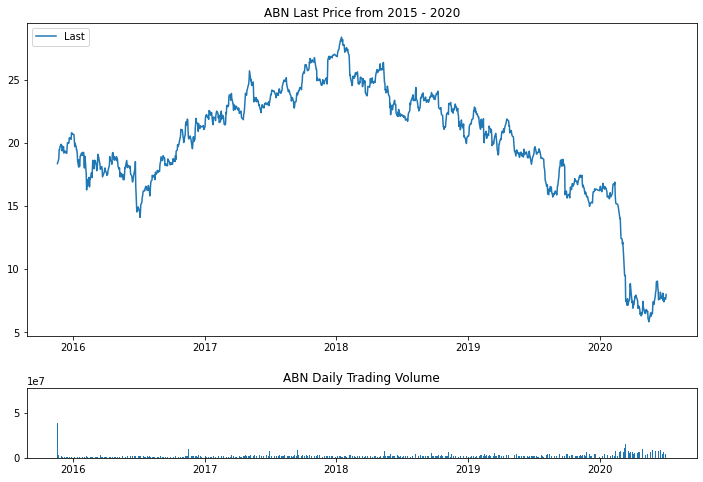

In [24]:
# The top plot consisting of daily closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan= 3, colspan=4)
top.plot(prices.index, prices, label = 'Last')
plt.title('ABN Last Price from 2015 - 2020')
plt.legend(loc = 2)
# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')
plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

Plotting a candlestick chart

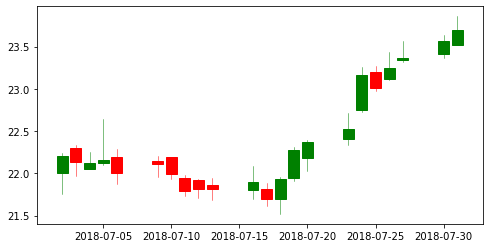

In [30]:
# pip install mpl-finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
df_subset = quandl.get('EURONEXT/ABN',  start_date = '2018-07-01', end_date = '2018-07-31')
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8, 4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup='green', colordown='red')
plt.show()